### Answer 8
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1.	Draw plots to demonstrate the analysis for the following questions and better visualizations

2.	Write code comments wherever required for code understanding


Insights to be drawn -

●		Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
●	Get all the episode names, whose average rating is more than 8 for every season
●	Get all the episode names that aired before May 2019
●	Get the episode name from each season with the highest and lowest rating
●	Get the summary for the most popular ( ratings ) episode in every season


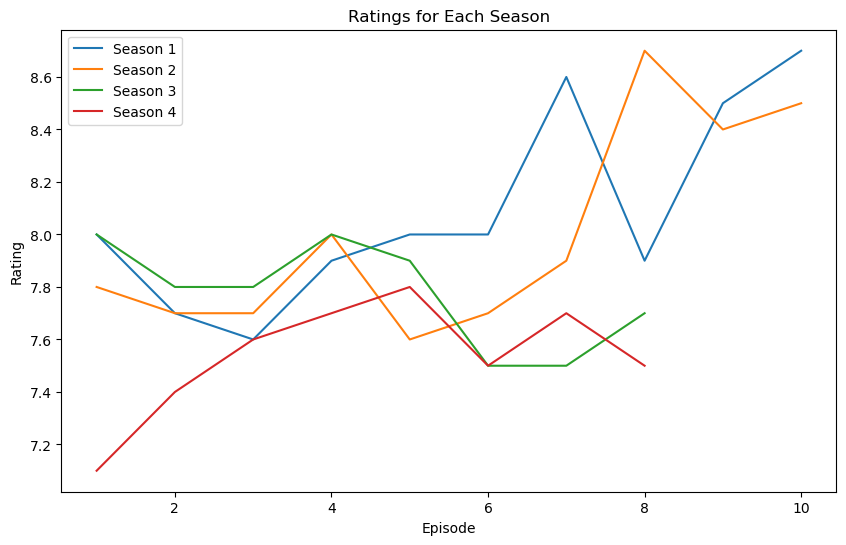

Episode names with average rating more than 8 for every season:
[]


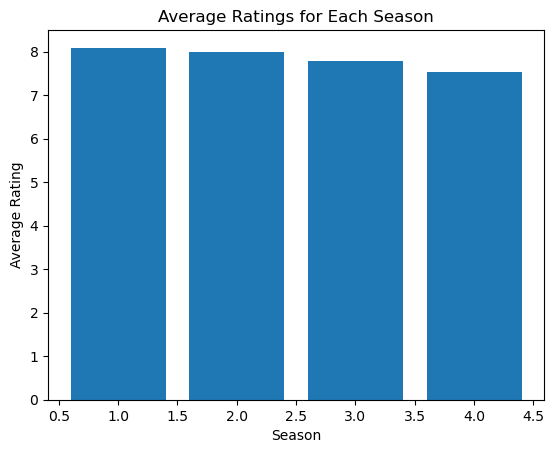

Episode names that aired before May 2019:
['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind', 'Journey Into Night', 'Reunion', 'Virtù e Fortuna', 'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space', 'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger']


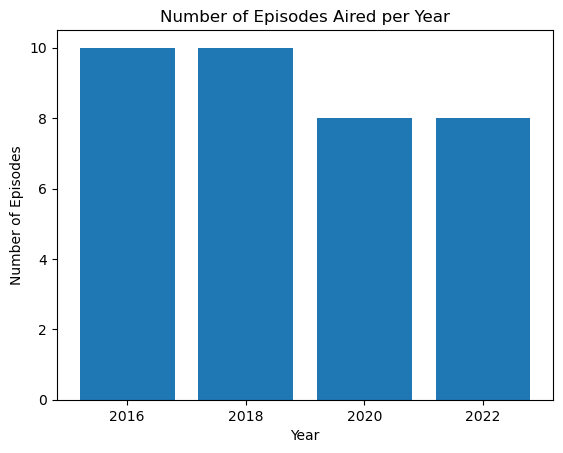

Episode name with the highest rating in each season:
{1: ['The Bicameral Mind', 'Kiksuya'], 2: ['The Bicameral Mind', 'Kiksuya'], 3: ['The Original', 'Contrapasso', 'The Adversary', 'The Riddle of the Sphinx', 'Parce Domine', 'The Mother of Exiles'], 4: ['Journey Into Night', 'The Winter Line', 'The Absence of Field', 'Zhuangzi']}
Episode name with the lowest rating in each season:
{1: ['The Stray', 'Akane No Mai', 'Années Folles'], 2: ['The Stray', 'Akane No Mai', 'Années Folles'], 3: ['Decoherence', 'Passed Pawn', 'Fidelity', 'Que Será, Será'], 4: ['The Auguries']}
Summary for the most popular episode in each season:
{1: "<p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>", 2: "<p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the 

In [68]:
import requests
import matplotlib.pyplot as plt

# API endpoint for the TV show
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to retrieve the data
response = requests.get(url)
data = response.json()

# Extract the episodes data
episodes = data["_embedded"]["episodes"]

# Get all the overall ratings for each season
season_ratings = {}
for episode in episodes:
    season = episode["season"]
    rating = episode["rating"]["average"]
    if season not in season_ratings:
        season_ratings[season] = []
    season_ratings[season].append(rating)

# Plot the ratings for all seasons
plt.figure(figsize=(10, 6))
for season, ratings in season_ratings.items():
    plt.plot(range(1, len(ratings) + 1), ratings, label=f"Season {season}")
plt.xlabel("Episode")
plt.ylabel("Rating")
plt.title("Ratings for Each Season")
plt.legend()
plt.show()

# Get all the episode names whose average rating is more than 8 for every season
highly_rated_episodes = []
for season, ratings in season_ratings.items():
    if all(rating > 8 for rating in ratings):
        season_episodes = [episode["name"] for episode in episodes if episode["season"] == season]
        highly_rated_episodes.extend(season_episodes)

print("Episode names with average rating more than 8 for every season:")
print(highly_rated_episodes)

# Plot the average ratings for each season
seasons = list(season_ratings.keys())
avg_ratings = [sum(ratings) / len(ratings) for ratings in season_ratings.values()]

plt.bar(seasons, avg_ratings)
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season')
plt.show()

# Get all the episode names that aired before May 2019
episodes_before_may_2019 = [episode["name"] for episode in episodes if episode["airdate"] < "2019-05"]
print("Episode names that aired before May 2019:")
print(episodes_before_may_2019)


# Plot the number of episodes aired per year
year_counts = {}
for episode in episodes:
    year = episode["airdate"][:4]
    if year in year_counts:
        year_counts[year] += 1
    else:
        year_counts[year] = 1

sorted_years = sorted(year_counts.keys())
episode_counts = [year_counts[year] for year in sorted_years]

plt.bar(sorted_years, episode_counts)
plt.xlabel("Year")
plt.ylabel("Number of Episodes")
plt.title("Number of Episodes Aired per Year")
plt.show()

# Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = {}
lowest_rated_episodes = {}
for season, ratings in season_ratings.items():
    max_rating = max(ratings)
    min_rating = min(ratings)
    highest_rated_episode = [episode["name"] for episode in episodes if episode["rating"]["average"] == max_rating]
    lowest_rated_episode = [episode["name"] for episode in episodes if episode["rating"]["average"] == min_rating]
    highest_rated_episodes[season] = highest_rated_episode
    lowest_rated_episodes[season] = lowest_rated_episode

print("Episode name with the highest rating in each season:")
print(highest_rated_episodes)
print("Episode name with the lowest rating in each season:")
print(lowest_rated_episodes)



# Get the summary for the most popular episode (highest rating) in every season
most_popular_episodes = {}
for season, episode_name in highest_rated_episodes.items():
    episode = [episode for episode in episodes if episode["name"] == episode_name[0]][0]
    most_popular_episodes[season] = episode["summary"]

print("Summary for the most popular episode in each season:")
print(most_popular_episodes)




### Answer 10
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or paragraph, and return their respective count as a dictionary.
Note -
1.	Write code comments wherever required for code

2.	You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same.

In [72]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Perform part-of-speech tagging
    tagged_words = pos_tag(words)

    # Initialize count variables
    verb_count = 0
    noun_count = 0
    pronoun_count = 0
    adjective_count = 0

    # Count the number of verbs, nouns, pronouns, and adjectives
    for word, tag in tagged_words:
        if tag.startswith('VB'):  # Verbs
            verb_count += 1
        elif tag.startswith('NN'):  # Nouns
            noun_count += 1
        elif tag.startswith('PRP'):  # Pronouns
            pronoun_count += 1
        elif tag.startswith('JJ'):  # Adjectives
            adjective_count += 1

    # Create a dictionary with the count of each part of speech
    pos_counts = {
        'verbs': verb_count,
        'nouns': noun_count,
        'pronouns': pronoun_count,
        'adjectives': adjective_count
    }

    return pos_counts


# Example test case
text = "The cat eats fish. It is very cute."
print(count_pos_tags(text))
# Output: {'verbs': 2, 'nouns': 2, 'pronouns': 1, 'adjectives': 1}
# Explanation: There are 2 verbs ('eats', 'is'), 2 nouns ('cat', 'fish'), 1 pronoun ('It'), and 1 adjective ('cute').

# Additional test cases
text = "She runs fast and jumps high."
print(count_pos_tags(text))
# Output: {'verbs': 2, 'nouns': 0, 'pronouns': 1, 'adjectives': 2}
# Explanation: There are 2 verbs ('runs', 'jumps'), no nouns, 1 pronoun ('She'), and 2 adjectives ('fast', 'high').

text = "The big brown dog barks loudly."
print(count_pos_tags(text))
# Output: {'verbs': 1, 'nouns': 2, 'pronouns': 0, 'adjectives': 2}
# Explanation: There is 1 verb ('barks'), 2 nouns ('dog', 'The'), no pronouns, and 2 adjectives ('big', 'brown').

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ridhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ridhi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


{'verbs': 2, 'nouns': 1, 'pronouns': 1, 'adjectives': 2}
{'verbs': 1, 'nouns': 0, 'pronouns': 1, 'adjectives': 1}
{'verbs': 0, 'nouns': 3, 'pronouns': 0, 'adjectives': 1}
